In [70]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
import re

In [71]:
data = pd.read_csv("C:/Users/97252/Desktop/כרייה וניתוח נתונים מתקדם בפייתון/Matala_2/matala2_cosmetics_2019-Nov.csv")
data = pd.DataFrame(data)
data.head()

C:\Users\97252\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


## Question 1

In [72]:
# datetime המרת העמודה
data['event_time'] = pd.to_datetime(data['event_time'])

# מיון הנתונים לפי העמודות המתבקשות
data = data.sort_values(['user_session', 'event_time'])

# יצירת עמודה חדשה עם הזמן בשניות עד לביקור הבא
data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.total_seconds().fillna(0)
data.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
522763,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
1443597,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0
1933123,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0
1662416,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0
1800687,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0
1800717,2019-11-14 04:00:28+00:00,view,5861619,1487580008246412266,NaN,lador,6.38,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,95.0
1800759,2019-11-14 04:02:03+00:00,view,5861591,1487580009143992338,NaN,lador,2.22,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,0.0
284392,2019-11-03 12:45:44+00:00,view,5846437,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,11.0
284416,2019-11-03 12:45:55+00:00,view,5846436,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,0.0
2046636,2019-11-15 22:03:28+00:00,view,5847576,1982860263572898112,NaN,concept,7.78,530580938,0000645a-8160-4a3d-91bf-154bff0a22e3,287.0


## Question 2
### יצאתי מנקודת הנחה כמו שענת אמרה כי כאשר עוברים יותר מחמישה ימים בין ביקורים מספר הפאנל של המשתמש עולה באחד

In [73]:
# נמיין דאטה לפי עמודות רצויות
data = data.sort_values(['user_id', 'event_time'])

# ניצור עמודה המכילה את הפרשי הזמנים לכל משתמש בין זמני האירוע שלו
data['time_diff'] = data.groupby('user_id')['event_time'].diff()

# ניצור עמודה חדשה הנותנת תוצאה בוליאנית כאשר הפרשי הזמנים גדולים או קטנים מחמישה ימים
data['is_funnel_start'] = data['time_diff'].gt(pd.Timedelta(days=5))

# ניצור את העמודה החדשה כאשר נקבץ את המידע פר משתמש
data['funnel_number'] = data.groupby('user_id')['is_funnel_start'].cumsum() + 1

# נוריד מהדאטה את העמודות הקודמות שיצרנו שאינן נחוצות
data = data.drop(['time_diff', 'is_funnel_start'], axis=1)

# קוד לבדיקת הדאטה
data[data['user_id']==10280338]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
2683576,2019-11-20 18:08:14+00:00,cart,5809910,1602943681873052386,NaN,grattol,5.24,10280338,bcc9bfa0-8a71-485d-b315-297b0038b4c2,8.0,1
2683594,2019-11-20 18:08:22+00:00,cart,5809912,1602943681873052386,NaN,grattol,5.24,10280338,bcc9bfa0-8a71-485d-b315-297b0038b4c2,5.0,1
2683611,2019-11-20 18:08:27+00:00,view,5814046,1487580005092295511,NaN,grattol,6.27,10280338,bcc9bfa0-8a71-485d-b315-297b0038b4c2,17.0,1
2683649,2019-11-20 18:08:44+00:00,remove_from_cart,5868787,1924049110428549877,NaN,oniq,10.32,10280338,bcc9bfa0-8a71-485d-b315-297b0038b4c2,1.0,1
2683653,2019-11-20 18:08:45+00:00,remove_from_cart,5885779,1924049110428549877,NaN,oniq,10.32,10280338,bcc9bfa0-8a71-485d-b315-297b0038b4c2,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
3904911,2019-11-27 04:31:41+00:00,view,5900480,1761186209054327497,NaN,NaN,9.19,10280338,aaefeac4-ea7b-d824-7685-67737473868b,49.0,2
3904945,2019-11-27 04:32:30+00:00,view,5902112,1487580007675986893,NaN,NaN,2.38,10280338,aaefeac4-ea7b-d824-7685-67737473868b,257.0,2
3905167,2019-11-27 04:36:47+00:00,view,5876344,1487580013950664926,NaN,NaN,55.56,10280338,aaefeac4-ea7b-d824-7685-67737473868b,804.0,2
3905777,2019-11-27 04:50:11+00:00,remove_from_cart,5900653,1819693959081886239,NaN,kinetics,6.51,10280338,aaefeac4-ea7b-d824-7685-67737473868b,7.0,2


## Question 3

In [74]:
# יצירת העמודה החדשה
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1

# שורת קוד לבדיקת הדאטה
data[data['user_id']==576749575]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
3751800,2019-11-25 20:57:32+00:00,view,5813414,1897124478404526487,NaN,NaN,3.33,576749575,8508569a-e91d-44d2-84e9-9a1964291556,22.0,1,1
3751833,2019-11-25 20:57:54+00:00,view,5813416,1897124478404526487,NaN,NaN,5.56,576749575,8508569a-e91d-44d2-84e9-9a1964291556,19.0,1,2
3751863,2019-11-25 20:58:13+00:00,view,5818481,1487580007214613434,NaN,NaN,3.14,576749575,8508569a-e91d-44d2-84e9-9a1964291556,0.0,1,3
4626597,2019-11-30 21:20:29+00:00,view,5879280,1891434214553813877,NaN,masura,3.67,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,28.0,2,1
4626659,2019-11-30 21:20:57+00:00,view,4591,1487580007483048900,NaN,runail,5.65,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,105.0,2,2
4626914,2019-11-30 21:22:42+00:00,cart,4591,1487580007483048900,NaN,runail,5.65,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,67.0,2,3
4627080,2019-11-30 21:23:49+00:00,cart,5809288,1487580007675986893,NaN,bpw.style,0.67,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,29.0,2,4
4627146,2019-11-30 21:24:18+00:00,cart,5843545,1487580010628776014,NaN,NaN,3.76,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,16.0,2,5
4627183,2019-11-30 21:24:34+00:00,view,5849034,1487580007634043851,NaN,uno,6.78,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,56.0,2,6
4627268,2019-11-30 21:25:30+00:00,view,5849034,1487580007634043851,NaN,uno,6.78,576749575,b192327e-391c-42e4-8ec0-2353898dba3e,42.0,2,7


## Question 4

In [75]:
# דאטה עם תקלה במחיר לפני השינוי
data[data['user_session']=='cf5d7069-7465-4ec5-a9be-c911bc1b9f95']

# ניתן לראות שבשורה 100 לדוגמה, קיימת חריגה בעמודת מחיר ומופיעים שם תווים לא חוקיים

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
36,2019-11-01 00:02:15+00:00,remove_from_cart,5864286,1597770225539875791,NaN,NaN,20.16,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,83.0,1,1
51,2019-11-01 00:03:38+00:00,cart,5864286,1597770225539875791,NaN,NaN,20.16,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,51.0,1,2
60,2019-11-01 00:04:29+00:00,view,5864480,1597770225539875791,NaN,NaN,29.21,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,80.0,1,3
85,2019-11-01 00:05:49+00:00,view,5864544,1783999072332415142,NaN,NaN,19.05,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,45.0,1,4
94,2019-11-01 00:06:34+00:00,view,5864545,1783999072332415142,NaN,NaN,19.05,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,5
100,2019-11-01 00:07:14+00:00,view,5864585,1783999072332415142,NaN,NaN,24.92 on sale,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,45.0,1,6
105,2019-11-01 00:07:59+00:00,view,5876017,1487580011677352062,NaN,NaN,17.78,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,7
108,2019-11-01 00:08:39+00:00,view,5864578,1783999072332415142,NaN,NaN,26.35,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,37.0,1,8
113,2019-11-01 00:09:16+00:00,view,5864281,1487580011585077370,NaN,NaN,18.1,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,9
124,2019-11-01 00:09:56+00:00,view,5864538,1487580011585077370,NaN,NaN,17.62,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,53.0,1,10


In [76]:
# type float יצירת פונקציה אשר מזהה תווים שאינם חוקיים, מסירה אותם וממירה ל
def extract_price(string):
    pattern = r'[^\d.]'  # מתאים לכל תו שאינו מספר או נקודה
    cleaned_string = re.sub(pattern, '', string)  # מסיר כל התווים הלא רצויים מהטקסט
    return float(cleaned_string) if cleaned_string else None  # converts text to float, if not possible returns None.

# float החלפת הערכים בעמודה הרצויה, הסרת תווים לא רצויים והמרה לסוג 
data['price'] = data['price'].astype(str).apply(extract_price)

# הצגת השינוי בדאטה
data[data['user_session']=='cf5d7069-7465-4ec5-a9be-c911bc1b9f95']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
36,2019-11-01 00:02:15+00:00,remove_from_cart,5864286,1597770225539875791,NaN,NaN,20.16,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,83.0,1,1
51,2019-11-01 00:03:38+00:00,cart,5864286,1597770225539875791,NaN,NaN,20.16,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,51.0,1,2
60,2019-11-01 00:04:29+00:00,view,5864480,1597770225539875791,NaN,NaN,29.21,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,80.0,1,3
85,2019-11-01 00:05:49+00:00,view,5864544,1783999072332415142,NaN,NaN,19.05,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,45.0,1,4
94,2019-11-01 00:06:34+00:00,view,5864545,1783999072332415142,NaN,NaN,19.05,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,5
100,2019-11-01 00:07:14+00:00,view,5864585,1783999072332415142,NaN,NaN,24.92,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,45.0,1,6
105,2019-11-01 00:07:59+00:00,view,5876017,1487580011677352062,NaN,NaN,17.78,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,7
108,2019-11-01 00:08:39+00:00,view,5864578,1783999072332415142,NaN,NaN,26.35,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,37.0,1,8
113,2019-11-01 00:09:16+00:00,view,5864281,1487580011585077370,NaN,NaN,18.10,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,40.0,1,9
124,2019-11-01 00:09:56+00:00,view,5864538,1487580011585077370,NaN,NaN,17.62,565876667,cf5d7069-7465-4ec5-a9be-c911bc1b9f95,53.0,1,10


## Question 5

### As we can see, the types of events are: view, cart, remove_from_cart and purchase.
#### View has the highest counts of apearing. 
#### Forthermore it is easy to notice that about 3/4 of the products which are added to the cart are also removed from it.
#### As for the purchese, only a quarter of the products that were added to the cart are being purchesed.

In [77]:
# The types of events in the data
data['event_type'].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

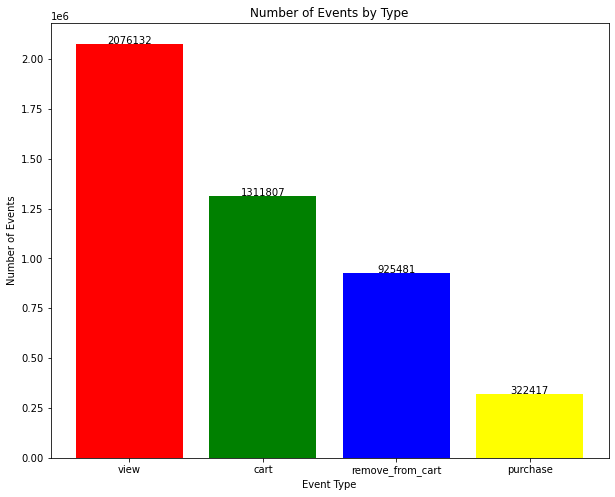

In [78]:
data['event_type'] = data['event_type'].str.split().str[0]

event_counts = data['event_type'].value_counts()

fig, ax = plt.subplots()

# עבור כל עמודה, הוסף את הערכים 
for i, (index, value) in enumerate(event_counts.iteritems()):
    # משמאל לימין, מספר העמודה, גובה הטקסט מעל העמודה, ערך העמודה, מרכוז הטקסט מעל העמודה
    ax.text(i , value + 0.5, str(value), ha='center')

event_counts = data['event_type'].value_counts()
plt.bar(event_counts.index, event_counts.values, color=['red','green','blue','yellow'])
plt.title('Number of Events by Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
fig.set_size_inches(10, 8)
plt.show()


## Question 6
#### למיטב הבנתי, לא יכול להופיע אותו ביקור של משתמש בתי שורות בדאטה, כלומר, לכל משתמש יש מספר שורות וכל שורה מייצגת מספר ביקור שונה אחד מהשני

In [79]:
# יצירת דאטה פריים חדש
session_data = pd.DataFrame()
# השמת העמודות הקיימות בדאטה פריים החדש ומחיקת שורות כפולות בדאטה
# a
session_data['user_id'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_id'].reset_index(drop=True)
# b
session_data['user_session'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_session'].reset_index(drop=True)
# c
session_data['funnel_number'] = data.drop_duplicates(subset=['user_id', 'user_session'])['funnel_number'].reset_index(drop=True)
# d
session_data['index_in_funnel'] = data.drop_duplicates(subset=['user_id', 'user_session'])['index_in_funnel'].reset_index(drop=True)

#  יצירת עמודות חדשות
# e
session_data['number_of_events'] = data.groupby(['user_id', 'user_session'])['event_time'].count().reset_index(drop=True)
# f
session_data['session_duration'] = data.groupby(['user_id', 'user_session'])['event_time'].max().reset_index(drop=True) - data.groupby(['user_id', 'user_session'])['event_time'].min().reset_index(drop=True)
# g
session_data['list_of_viewed'] = data[data['event_type'] == 'view'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
# h 
session_data['list_of_added_to_cart'] = data[data['event_type'] == 'cart'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
# i
session_data['list_of_purchased'] = data[data['event_type'] == 'purchase'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data

,user_id,user_session,funnel_number,index_in_funnel,number_of_events,session_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0 days 00:00:00,[5240],"[5745712, 49674, 5587748, 4590, 34763]","[5812033, 5724621, 5809910, 5811668]"
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0 days 00:00:00,[5814066],[5569506],"[5766379, 5614842]"
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,28.0,0 days 01:03:09,"[5800358, 5800349, 5800349, 5800358, 5712576, ...","[5896421, 5841190, 5896422, 5896419]","[5809910, 5809911, 5809912, 5862544, 5870648, ..."
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,1.0,0 days 00:00:00,[5711087],"[5896421, 5896422]","[5850620, 5850625, 5850621, 5850619, 5816166, ..."
4,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0 days 00:00:00,[5711145],"[5811668, 5811668, 5724608, 5724658, 5724658, ...","[5846442, 5686083]"
...,...,...,...,...,...,...,...,...,...
942377,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,NaN,NaT,NaN,NaN,NaN
942378,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,NaN,NaT,NaN,NaN,NaN
942379,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,NaN,NaT,NaN,NaN,NaN
942380,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,NaN,NaT,NaN,NaN,NaN
